# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
no_cities = len(cities)
no_cities

602

## Perform API Calls

In [3]:
# Set url for API
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Set parameters for query url
unit = 'imperial'
api_key = weather_api_key

# Create empty list to hold the data
city_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_spd = []
country = []
date = []

# At the beginning, data successfully retrieved equals 0
record = 0

# Print beginning log statement
print(f'Beginning Data Retrieval')     
print('-----------------------------------')
    
# Apply for loop  to retrive the data
for city in cities:
    
    # Create search query, make request and store in json
    query_url = base_url + 'q=' + city + '&appid=' + api_key + '&units=' + unit
    response_data = requests.get(query_url).json()
    
    # Try to grab the data if they are available in the OpenWeather API
    try:
        
        # Get data form JSON 
        name = response_data['name']
        city_name.append(name)
        lat = response_data['coord']['lat']
        latitude.append(lat)
        lon = response_data['coord']['lon']
        longitude.append(lon)
        mtemp = response_data['main']['temp_max']
        max_temp.append(mtemp)
        hmd = response_data['main']['humidity']
        humidity.append(hmd)
        clouds = response_data['clouds']['all']
        cloudiness.append(clouds)
        windsp = response_data['wind']['speed']
        wind_spd.append(windsp)
        cnt = response_data['sys']['country']
        country.append(cnt)
        d = response_data['dt']
        date.append(d)
        
        # Plus 1 for the successful data retrived      
        record += 1
        
        # Print log statement for successful data retrived
        print(f'Processing Record {record} of {no_cities} | {city}')
    
    # Handle exceptions if the data is not available
    except:
        # Print log statement for unavailable data retrived
        print(f'City not found | {city}')
    
    # Add a one second interval between queries to stay within API query limits
    time.sleep(1)
        
# Print ending log statement
print(f'-----------------------------------')
print(f'Data Retrieval Completed')
print(f'No. of record: {record}')
print(f'No. of cities not found {no_cities - record}')
print(f'-----------------------------------')

Beginning Data Retrieval
-----------------------------------
Processing Record 1 of 602 | faanui
Processing Record 2 of 602 | thompson
Processing Record 3 of 602 | cape town
City not found | tabiauea
Processing Record 4 of 602 | goderich
Processing Record 5 of 602 | kargil
Processing Record 6 of 602 | te anau
Processing Record 7 of 602 | puerto ayora
Processing Record 8 of 602 | dikson
Processing Record 9 of 602 | hobart
Processing Record 10 of 602 | rikitea
Processing Record 11 of 602 | vila franca do campo
Processing Record 12 of 602 | albany
Processing Record 13 of 602 | punta arenas
Processing Record 14 of 602 | henties bay
Processing Record 15 of 602 | lebu
Processing Record 16 of 602 | plettenberg bay
Processing Record 17 of 602 | grindavik
Processing Record 18 of 602 | mataura
Processing Record 19 of 602 | victoria
Processing Record 20 of 602 | port macquarie
Processing Record 21 of 602 | pachino
Processing Record 22 of 602 | bluff
Processing Record 23 of 602 | robertsport
Proce

Processing Record 192 of 602 | los llanos de aridane
Processing Record 193 of 602 | mount isa
Processing Record 194 of 602 | umm kaddadah
Processing Record 195 of 602 | mayumba
Processing Record 196 of 602 | acapulco
Processing Record 197 of 602 | the valley
Processing Record 198 of 602 | nauta
Processing Record 199 of 602 | gornyye klyuchi
Processing Record 200 of 602 | luangwa
Processing Record 201 of 602 | dawlatabad
Processing Record 202 of 602 | vardo
Processing Record 203 of 602 | honningsvag
Processing Record 204 of 602 | alcaniz
Processing Record 205 of 602 | bathsheba
Processing Record 206 of 602 | bernalillo
Processing Record 207 of 602 | jasper
Processing Record 208 of 602 | bara
Processing Record 209 of 602 | mandalgovi
Processing Record 210 of 602 | doha
Processing Record 211 of 602 | mbigou
Processing Record 212 of 602 | douala
Processing Record 213 of 602 | seymchan
Processing Record 214 of 602 | paramonga
Processing Record 215 of 602 | namatanai
Processing Record 216 of

Processing Record 383 of 602 | lipin bor
Processing Record 384 of 602 | bolobo
Processing Record 385 of 602 | ormara
Processing Record 386 of 602 | norman wells
Processing Record 387 of 602 | el alto
Processing Record 388 of 602 | grand gaube
Processing Record 389 of 602 | myitkyina
Processing Record 390 of 602 | dicabisagan
Processing Record 391 of 602 | husavik
Processing Record 392 of 602 | puerto escondido
Processing Record 393 of 602 | kargopol
Processing Record 394 of 602 | kikwit
City not found | samusu
Processing Record 395 of 602 | qaqortoq
City not found | achisay
Processing Record 396 of 602 | huarmey
Processing Record 397 of 602 | urumqi
Processing Record 398 of 602 | omsukchan
Processing Record 399 of 602 | sheltozero
Processing Record 400 of 602 | kumhari
Processing Record 401 of 602 | raudeberg
Processing Record 402 of 602 | kupang
Processing Record 403 of 602 | megion
Processing Record 404 of 602 | humberto de campos
Processing Record 405 of 602 | richards bay
Processin

In [4]:
# Check null of data retrived successfully in each column
data_lenth = {
    'name': len(city_name),
    'lat': len(latitude),
    'lng': len(longitude),
    'temp': len(max_temp),
    'humd': len(humidity),
    'cloud': len(cloudiness),
    'wind': len(wind_spd),
    'country': len(country),
    'date': len(date)
}

print(json.dumps(data_lenth, indent=4))

{
    "name": 550,
    "lat": 550,
    "lng": 550,
    "temp": 550,
    "humd": 550,
    "cloud": 550,
    "wind": 550,
    "country": 550,
    "date": 550
}


## Convert Raw Data to DataFrame

In [5]:
response_data_df = pd.DataFrame({
    'City' : city_name,
    'Latitude' : latitude,
    'Longitude' : longitude,
    'Max Temp' : max_temp,
    'Humidity' : humidity,
    'Cloudiness' : cloudiness,
    'Wind Speed' : wind_spd,
    'Country' : country,
    'Date' : date
})

# Display dataframe
response_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Faanui,-16.48,-151.75,78.57,76,13,10.11,PF,1603378917
1,Thompson,55.74,-97.86,21.20,92,75,4.70,CA,1603378919
2,Cape Town,-33.93,18.42,70.00,64,0,20.80,ZA,1603378884
3,Goderich,43.75,-81.72,48.00,88,100,7.63,CA,1603378880
4,Kargil,34.57,76.10,41.16,56,3,6.26,IN,1603378924


In [6]:
# Get basic statistical details
response_data_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,21.518236,19.194636,61.925291,71.296364,50.420000,8.346055,1.603379e+09
std,33.175860,90.254627,22.442923,21.742603,39.568529,5.811521,2.409074e+02
min,-54.800000,-179.170000,2.100000,8.000000,0.000000,0.340000,1.603379e+09
25%,-4.112500,-61.337500,44.600000,62.000000,2.000000,4.340000,1.603379e+09
50%,25.760000,18.620000,67.485000,76.000000,54.000000,6.930000,1.603379e+09
75%,47.957500,98.660000,79.440000,88.000000,90.000000,11.180000,1.603379e+09
max,78.220000,178.420000,102.130000,100.000000,100.000000,47.200000,1.603380e+09


## Inspect the data and remove the cities where the humidity > 100%.

In [7]:
# Get the indices of cities that have humidity over 100%.
humidity_over_hundred = response_data_df[response_data_df.loc[response_data_df['Humidity'] > 100]]
no_cities_humd = humidity_over_hundred['City'].count()

In [8]:
# Create if statement for city that has humidity over 100%
if no_cities_humd == 0:
    # No. of city = 0, copy df from original df
    weather_data = response_data_df.copy()
    print(f'There are no cities that have humidity over 100%')
else:
    # If there is at least 1 city that humidity over 100%, assign to a new df by df.drop() to get a cleaned df
    weather_data = response_data_df.drop[humidity_over_hundred.index, inplace:False]

There are no cities that have humidity over 100%


In [9]:
# Export the city data into a .csv file
weather_data_csv = weather_data.to_csv(output_data_file, index=False, header=True)

## Plotting the Data

In [2]:
# Read the csv file
weather_data_df = pd.read_csv(output_data_file)

# View weather data in dataframe
weather_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Faanui,-16.48,-151.75,78.57,76,13,10.11,PF,1603378917
1,Thompson,55.74,-97.86,21.20,92,75,4.70,CA,1603378919
2,Cape Town,-33.93,18.42,70.00,64,0,20.80,ZA,1603378884
3,Goderich,43.75,-81.72,48.00,88,100,7.63,CA,1603378880
4,Kargil,34.57,76.10,41.16,56,3,6.26,IN,1603378924


In [3]:
# Get the date of data retrived
time = time.localtime(weather_data_df['Date'][0])
date = f'{time.tm_year}-{time.tm_mon}-{time.tm_mday}'

In [4]:
# Define x values for the first 4 plots
cities_lat = weather_data_df['Latitude']

### Latitude vs. Temperature Plot

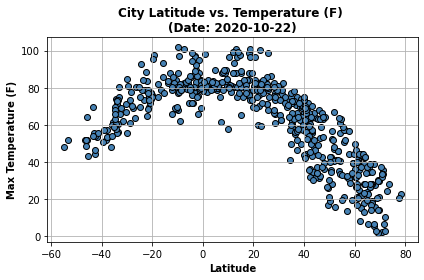

In [5]:
# Create scatter plot between Latitude and Max Temperature
lat_temp = plt.scatter(cities_lat, 
                       weather_data_df['Max Temp'], 
                       marker='o', 
                       color='steelblue', 
                       edgecolor='black')

# Add title&labels and modify plot&layout
plt.title(f'City Latitude vs. Temperature (F) \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Max Temperature (F)', fontweight='bold')
plt.grid()
plt.tight_layout()

# Save figure and show the the plot
plt.savefig('Images/lat_temp.png')
plt.show()

#### Observation I

The scatter plot between *city latitude and maximum (max) temperature(F)* shows that cities located closer to the equator line, the max temperature tends to be higher than cities that are located further from the equator line.

### Latitude vs. Humidity Plot

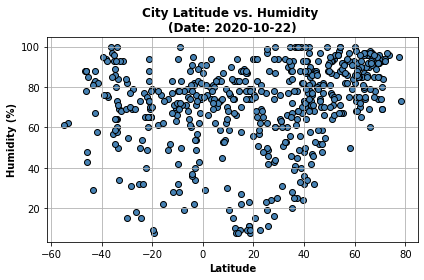

In [6]:
# Create scatter plot between Latitude and Humidity
lat_humd = plt.scatter(cities_lat, 
                       weather_data_df['Humidity'], 
                       marker='o', 
                       color='steelblue', 
                       edgecolor='black')

# Add title&labels and modify plot&layout
plt.title(f'City Latitude vs. Humidity \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Humidity (%)', fontweight='bold')
plt.grid()
plt.tight_layout()

# Save figure and show the the plot
plt.savefig('Images/lat_humd.png')
plt.show()

#### Observation II

The scatter plot between *city latitude and humidity(%)* shows the irrelevant of the city's location and percentage of humidity.

### Latitude vs. Cloudiness Plot

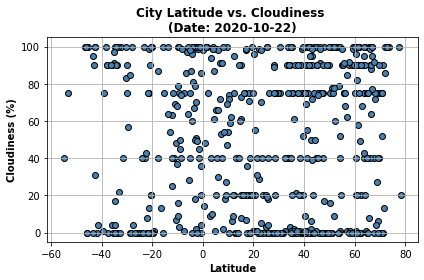

In [7]:
# Create scatter plot between Latitude and Cloundiness
lat_cld = plt.scatter(cities_lat, 
                       weather_data_df['Cloudiness'], 
                       marker='o', 
                       color='steelblue', 
                       edgecolor='black')

# Add title&labels and modify plot&layout
plt.title(f'City Latitude vs. Cloudiness \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Cloudiness (%)', fontweight='bold')
plt.grid()
plt.tight_layout()

# Save figure and show the the plot
plt.savefig('Images/lat_cloud.png')
plt.show()

#### Observation III

The scatter plot between *city latitude and cloudiness(%)* shows that there is no significant relation between city location and the density of clouds.

### Latitude vs. Wind Speed Plot

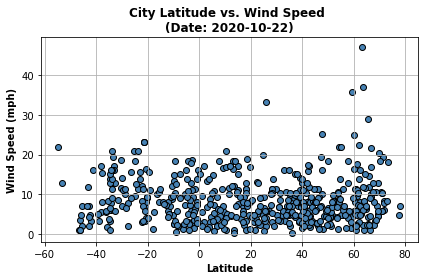

In [8]:
# Create scatter plot between Latitude and Wind Speed
lat_wind = plt.scatter(cities_lat, 
                       weather_data_df['Wind Speed'], 
                       marker='o', 
                       color='steelblue', 
                       edgecolor='black')

# Add title&labels and modify plot&layout
plt.title(f'City Latitude vs. Wind Speed \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Wind Speed (mph)', fontweight='bold')
plt.grid()
plt.tight_layout()

# Save figure and show the the plot
plt.savefig('Images/lat_wind.png')
plt.show()

#### Observation IV

The scatter plot between *city latitude and wind speed(mph)* shows that where cities are located is not related to the speed of wind. There are a few cities located between latitude 20 to 80 degrees where the wind speed is higer than others. However, the samples are small to make a conclusion that there is a relation between latitude and wind speed.      

## Linear Regression

In [9]:
# Generate dataframe only for cities in Northern Hemisphere
north_df = weather_data_df.loc[weather_data_df['Latitude'] >= 0]

# Generate dataframe only for cities in Northern Hemisphere
south_df = weather_data_df.loc[weather_data_df['Latitude'] < 0]

# Linear Regression: Focus on city latitude in Northern and Southern Hemisphere
# Define x_values for latitude in Northern and Southern Hemisphere
north_lat = north_df['Latitude'] # North
south_lat = south_df['Latitude'] # South

In [10]:
# Factors to analyze
regrs = ['Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

# Regression Calculation for Northern Hemisphere
north_corr = {}
north_rsq = {}
north_regrs_v = {}
north_eqline = {}

for n in regrs:
    
    # Calculate the correlation
    north_corr[n] = round(st.pearsonr(north_lat, north_df[n])[0],2)
    
    # Calculate linear regression values > (slope, intercept, rvalue, pvalue, stderr)
    linregrs_values = st.linregress(north_lat, north_df[n])
    
    # Calculate r-squared
    north_rsq[n] = round(linregrs_values[2]**2,5)
    
    # Calculate regression values
    north_regrs_v[n] = north_lat * linregrs_values[0] + linregrs_values[1]
    
    # y = mx + b
    north_eqline[n] = "y = " + str(round(linregrs_values[0],2)) + "x + " + str(round(linregrs_values[1],2))
    
# Regression Calculation for Southern Hemisphere
south_corr = {}
south_rsq = {}
south_regrs_v = {}
south_eqline = {}

for s in regrs:
    
    # Calculate the correlation
    south_corr[s] = round(st.pearsonr(south_lat, south_df[s])[0],2)
    
    # Calculate linear regression values > (slope, intercept, rvalue, pvalue, stderr)
    linregrs_values = st.linregress(south_lat, south_df[s])
    
    # Calculate r-squared
    south_rsq[s] = round(linregrs_values[2]**2,5)
    
    # Calculate regression values
    south_regrs_v[s] = south_lat * linregrs_values[0] + linregrs_values[1]
    
    # y = mx + b
    south_eqline[s] = "y = " + str(round(linregrs_values[0],2)) + "x + " + str(round(linregrs_values[1],2))


In [11]:
# 'Max Temp'
m = regrs[0]

# 'Humidity'
h = regrs[1]

# 'Cloudiness'
c = regrs[2]

# 'Wind Speed'
w = regrs[3]

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Northern Max Temp and Latitude is -0.87


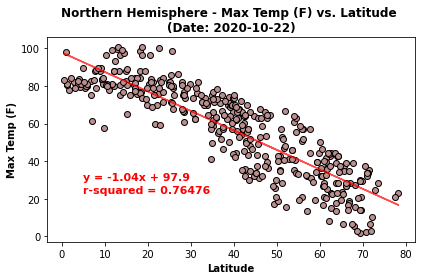

In [18]:
# Correlation value
print(f"The correlation between Northern {m} and Latitude is {north_corr[m]}")

# Define y values: Max Temperature (F)
north_temp = north_df[m]

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(north_lat,
            north_temp, 
            marker='o', 
            color='rosybrown', 
            edgecolor='black')

plt.plot(north_lat,north_regrs_v[m], color='red', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(f'{north_eqline[m]}',(5,30), fontsize=11, color="red", fontweight='bold')
plt.annotate(f'r-squared = {north_rsq[m]}', (5,23), fontsize=11, color="red", fontweight='bold')

# Define title and x/y labels
plt.title(f'Northern Hemisphere - {m} (F) vs. Latitude \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel(f'{m} (F)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()
pic1 = f'Images/north_temp.png'
plt.savefig(pic1)

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Southern Max Temp and Latitude is 0.75


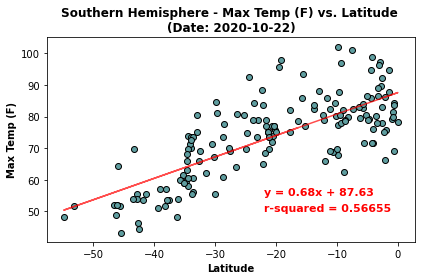

In [19]:
# Correlation value
print(f"The correlation between Southern {m} and Latitude is {south_corr[m]}")

# Define y values: Max Temperature (F)
south_temp = south_df[m]

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(south_lat,
            south_temp, 
            marker='o', 
            color='cadetblue', 
            edgecolor='black')

plt.plot(south_lat,south_regrs_v[m], color='red', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(f'{south_eqline[m]}',(-22,55), fontsize=11, color="red", fontweight='bold')
plt.annotate(f'r-squared = {south_rsq[m]}', (-22,50), fontsize=11, color="red", fontweight='bold')

# Define title and x/y labels
plt.title(f'Southern Hemisphere - {m} (F) vs. Latitude \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel(f'{m} (F)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()
pic2 = f'Images/south_temp.png'
plt.savefig(pic2)

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

#### Observation V

As the figures presented, linear regression lines and correlation values between latitude (north and south) and maximum temperature which illustrate that city latitude has an effect on temperature. In the other word, city latitude is correlated to temperature. The linear regression line for the northern hemisphere is an inverse correlation which means the lower latitude (closer the equator line) in the northern area, the higher the temperature. On the other hand, the linear regression line for the southern hemisphere is positive correlation which means the higher the latitude (closer the equator line) in the southern area, the higher the temperature. Moreover, r-values represent the predictable temperature data based on latitude. 

**Further Analysis**

The relation between temperature and other meteorological data; for example, humidity, wind speed or cloudiness, to discover other factors that affect the degree of temperature.

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Northern Humidity and Latitude is 0.39


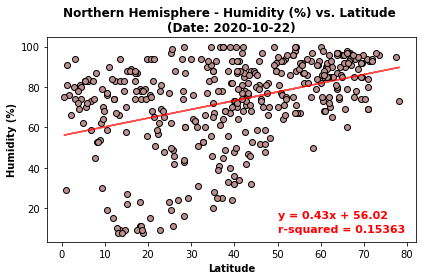

In [20]:
# Correlation value
print(f"The correlation between Northern {h} and Latitude is {north_corr[h]}")

# Define y values: Humidity (%)
north_humd = north_df[h] # y_values

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(north_lat,
            north_humd, 
            marker='o', 
            color='rosybrown', 
            edgecolor='black')

plt.plot(north_lat,north_regrs_v[h], color='red', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(f'{north_eqline[h]}', (50,15), fontsize=11, color="red", fontweight='bold')
plt.annotate(f'r-squared = {north_rsq[h]}', (50,8), fontsize=11, color="red", fontweight='bold')

# Define title and x/y labels
plt.title(f'Northern Hemisphere - {h} (%) vs. Latitude \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel(f'{h} (%)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()
pic3 = f'Images/north_humid.png'
plt.savefig(pic3)

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Southern Humidity and Latitude is -0.13


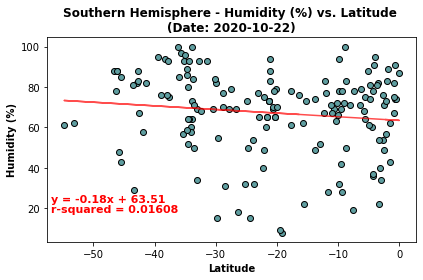

In [21]:
# Correlation value
print(f"The correlation between Southern {h} and Latitude is {south_corr[h]}")

# Define y values: Humidity (%)
south_humd = south_df[h] # y_values

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(south_lat,
            south_humd, 
            marker='o', 
            color='cadetblue', 
            edgecolor='black')

plt.plot(south_lat,south_regrs_v[h], color='red', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(f'{south_eqline[h]}', (-57,23), fontsize=11, color="red", fontweight='bold')
plt.annotate(f'r-squared = {south_rsq[h]}', (-57,18), fontsize=11, color="red", fontweight='bold')

# Define title and x/y labels
plt.title(f'Southern Hemisphere - {h} (%) vs. Latitude \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel(f'{h} (%)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()
pic4 = f'Images/south_humid.png'
plt.savefig(pic4)

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

#### Observation VI

As the figures presented, linear regression lines and correlation values between latitude (north and south) and percentage of humidity which illustrate the weak correlation between city location and humidity in that area. Also, the low r-squared values in both graphs indicate that this model might not be efficient in order to predict the humidity based on latitude.

**Further Analysis**

Humidity is the concentration of water vapor present in the air ("Humidity", Wikipedia). Therefore, the temperature might be one of the factors that causes the density of humidity. The correlation between humidity and temperature would be a further analysis. 

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Northern Cloudiness and Latitude is 0.15


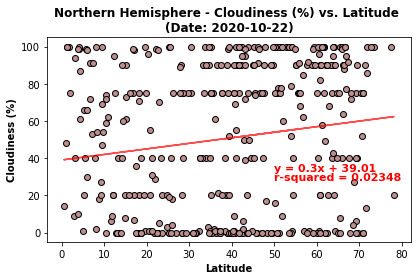

In [22]:
# Correlation value
print(f"The correlation between Northern {c} and Latitude is {north_corr[c]}")

# Define y values: Cloudiness (%)
north_cloud = north_df[c]

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(north_lat,
            north_cloud, 
            marker='o', 
            color='rosybrown', 
            edgecolor='black')

plt.plot(north_lat,north_regrs_v[c], color='red', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(f'{north_eqline[c]}', (50,33), fontsize=11, color="red", fontweight='bold')
plt.annotate(f'r-squared = {north_rsq[c]}', (50,28), fontsize=11, color="red", fontweight='bold')

# Define title and x/y labels
plt.title(f'Northern Hemisphere - {c} (%) vs. Latitude \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel(f'{c} (%)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()
pic5 = f'Images/north_cloud.png'
plt.savefig(pic5)

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Southern Cloudiness and Latitude is 0.09


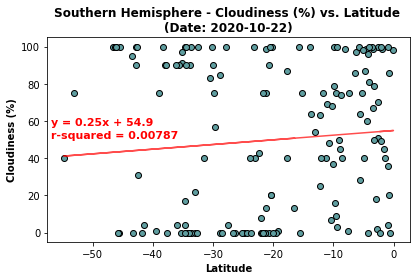

In [23]:
# Correlation value
print(f"The correlation between Southern {c} and Latitude is {south_corr[c]}")

# Define y values: Cloudiness (%)
south_cloud = south_df[c]

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(south_lat,
            south_cloud, 
            marker='o', 
            color='cadetblue', 
            edgecolor='black')

plt.plot(south_lat,south_regrs_v[c], color='red', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(f'{south_eqline[c]}', (-57,58), fontsize=11, color="red", fontweight='bold')
plt.annotate(f'r-squared = {south_rsq[c]}', (-57,51), fontsize=11, color="red", fontweight='bold')

# Define title and x/y labels
plt.title(f'Southern Hemisphere - {c} (%) vs. Latitude \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel(f'{c} (%)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()
pic6 = f'Images/south_cloud.png'
plt.savefig(pic6)

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

#### Observation VII

As the figures presented, correlation values between latitude (north and south) and percentage of cloudiness which illustrate the weak correlation between city location and cloudiness in that area. Linear regression lines and the low r-squared values in both graphs indicate that latitude might not be a significant factor that causes cloudiness.

**Further Analysis**

Other meteorological data,for example; temperature, might be considered to have more accurate analysis as an other variable to predict the cloudiness.

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Northern Wind Speed and Latitude is 0.09


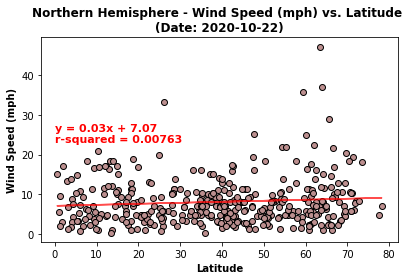

In [24]:
# Correlation value
print(f"The correlation between Northern {w} and Latitude is {north_corr[w]}")

# Define y values: Cloudiness (%)
north_wind = north_df[w]

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(north_lat,
            north_wind, 
            marker='o', 
            color='rosybrown', 
            edgecolor='black')

plt.plot(north_lat,north_regrs_v[w], color='red', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(f'{north_eqline[w]}', (0,26), fontsize=11, color="red", fontweight='bold')
plt.annotate(f'r-squared = {north_rsq[w]}', (0,23), fontsize=11, color="red", fontweight='bold')

# Define title and x/y labels
plt.title(f'Northern Hemisphere - {w} (mph) vs. Latitude \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel(f'{w} (mph)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()
pic7 = f'Images/north_wind.png'
plt.savefig(pic7)

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Southern Wind Speed and Latitude is -0.08


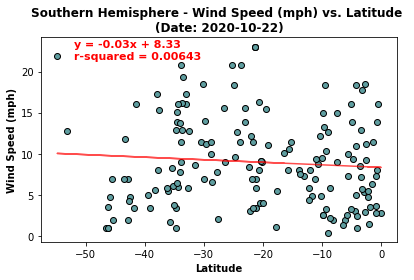

In [25]:
# Correlation value
print(f"The correlation between Southern {w} and Latitude is {south_corr[w]}")

# Define y values: Cloudiness (%)
south_wind = south_df[w]

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(south_lat,
            south_wind, 
            marker='o', 
            color='cadetblue', 
            edgecolor='black')

plt.plot(south_lat,south_regrs_v[w], color='red', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(f'{south_eqline[w]}', (-52,23), fontsize=11, color="red", fontweight='bold')
plt.annotate(f'r-squared = {south_rsq[w]}', (-52,21.5), fontsize=11, color="red", fontweight='bold')

# Define title and x/y labels
plt.title(f'Southern Hemisphere - {w} (mph) vs. Latitude \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel(f'{w} (mph)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()
pic8 = f'Images/south_wind.png'
plt.savefig(pic8)

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

#### Observation VII

As the figures presented, correlation values between latitude (north and south) and wind speed (mph) which illustrate the weak correlation between city location and wind speed in that area. Also, the linear regression lines and low r-squared values in both graphs support that latitude data might not be a good indicator to predict wind speed.

**Further Analysis**

Wind is air in motion. It is produced by the uneven heating of the earth's surface by the sun ("Wind", Weather Wiz Kids). That implies that temperature might be a significant factor causing wind. The further analysis would be finding statistical data between temperature and wind speed and visualize it into a plot.